In [ ]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.12.0

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
A
Y
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 40.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut, StratifiedKFold
from sklearn.utils import resample
import tensorflow as tf
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target
y = to_categorical(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xval,xtest, yval, ytest = train_test_split(xtest,ytest, test_size= 0.1, random_state=42)


In [ ]:
def NN():
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))

    model.add(Dense(16, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))

    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=NN, epochs=20,verbose=0)



In [ ]:
es = EarlyStopping(patience=5,restore_best_weights=True)

model.fit(xtrain, ytrain,callbacks=es,validation_data=(xval,yval))
holdout_score = model.score(xtest, ytest)
print(f'Hold-Out Score: {holdout_score}')

Hold-Out Score: 1.0


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
kfold_scores = cross_val_score(model, x, y, cv=kfold)

print(f'K-Fold Scores: {kfold_scores}')


K-Fold Scores: [1.         0.93333334 0.93333334 0.93333334 1.         0.93333334
 1.         0.93333334 1.         1.        ]


In [ ]:
nested_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
nested_kfold_scores = cross_val_score(model, x, np.argmax(y,axis=1), cv=nested_kfold)

print(f'Nested K-Fold Scores: {nested_kfold_scores}')


Nested K-Fold Scores: [1.         0.93333334 0.80000001 0.93333334 0.96666664]


In [ ]:
loocv = LeaveOneOut()
loocv_scores = cross_val_score(model, x, y, cv=loocv)

print(f'LOOCV Scores: {loocv_scores}')


LOOCV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1.]


In [ ]:
bootstrap_scores = []

for i in range(100):
    sample_x, sample_y = resample(x, y, replace=True)
    xtrain, xtest, ytrain, ytest = train_test_split(sample_x, sample_y, test_size=0.2, random_state=42)
    model.fit(xtrain, ytrain)
    score = model.score(xtest, ytest)
    bootstrap_scores.append(score)

bootstrap_scores = np.array(bootstrap_scores)

print(f'Bootstrap Scores: {bootstrap_scores}')

Bootstrap Scores: [0.96666664 0.83333331 0.89999998 0.89999998 1.         0.96666664
 0.93333334 0.89999998 0.76666665 1.         0.93333334 0.93333334
 0.96666664 1.         0.93333334 1.         0.96666664 1.
 0.76666665 1.         0.96666664 0.96666664 0.96666664 1.
 1.         0.96666664 0.96666664 0.93333334 0.96666664 0.96666664
 1.         0.89999998 0.93333334 1.         0.80000001 0.89999998
 0.89999998 0.93333334 0.96666664 0.96666664 0.93333334 0.76666665
 1.         0.89999998 0.89999998 0.86666667 0.96666664 0.93333334
 0.96666664 0.89999998 1.         0.76666665 0.96666664 1.
 1.         0.96666664 0.96666664 0.89999998 0.83333331 1.
 1.         1.         0.93333334 0.93333334 1.         0.96666664
 0.93333334 0.93333334 0.93333334 1.         1.         0.96666664
 0.93333334 0.96666664 0.96666664 0.93333334 1.         0.96666664
 0.89999998 0.93333334 0.89999998 0.86666667 0.80000001 0.96666664
 0.96666664 0.96666664 1.         0.93333334 0.96666664 0.93333334
 0.866666

Mean score: 0.9383333230018616
Standard deviation: 0.06224949811761359
Score interval: [0.76666665 1.        ]


Text(0.5, 1.0, 'Distribution of Bootstrap Scores')

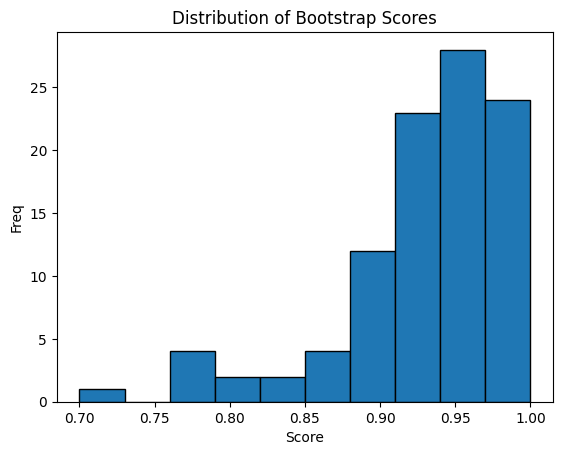

In [ ]:
mean = np.mean(bootstrap_scores)
std = np.std(bootstrap_scores)

interval = np.percentile(bootstrap_scores, [2.5, 97.5])

print(f'Mean score: {mean}')
print(f'Standard deviation: {std}')
print(f'Score interval: {interval}')


plt.hist(bootstrap_scores, bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Freq')
plt.title('Distribution of Bootstrap Scores')
